In [13]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '296388cd-8657-45e9-84ae-903d4bd6c784',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

{'status': {'timestamp': '2024-11-20T20:07:13.661Z', 'error_code': 0, 'error_message': None, 'elapsed': 25, 'credit_count': 1, 'notice': None, 'total_count': 10114}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11805, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [14]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [15]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-11-20T20:07:13.661Z,0,None,25,1,None,10114


In [16]:
pd.json_normalize(data['data'])

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,11805,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.978508e+07,1.978508e+07,False,NaN,1,NaN,NaN,None,2024-11-20T20:06:00.000Z,94214.343043,7.493917e+10,0.9780,0.402022,0.892219,4.635489,39.019096,48.992388,55.934221,1.864038e+12,60.2934,1.978501e+12,None,2024-11-20T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,9577,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204263e+08,1.204263e+08,True,NaN,2,NaN,NaN,None,2024-11-20T20:06:00.000Z,3052.450997,3.094537e+10,0.7926,0.074509,-2.316725,-3.532952,13.922601,18.695028,16.824997,3.675954e+11,11.8901,3.675954e+11,None,2024-11-20T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,104465,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.287671e+11,1.309757e+11,True,NaN,3,NaN,NaN,None,2024-11-20T20:05:00.000Z,1.000791,1.470000e+11,1.5221,-0.000144,-0.015138,-0.038993,0.124270,0.046860,0.060356,1.288690e+11,4.1671,1.310793e+11,None,2024-11-20T20:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,5426,Solana,SOL,solana,789,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.746217e+08,5.886696e+08,True,NaN,4,NaN,NaN,None,2024-11-20T20:06:00.000Z,232.541648,6.818529e+09,5.7817,-0.215653,-4.660213,10.758798,39.086462,57.762977,62.678669,1.103693e+11,3.5689,1.368902e+11,None,2024-11-20T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN
4,1839,BNB,BNB,bnb,2286,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440107e+08,1.440107e+08,False,NaN,5,NaN,NaN,None,2024-11-20T20:06:00.000Z,603.904094,2.169092e+09,7.2270,-0.073484,-2.136024,-0.868337,0.860659,3.152044,3.257831,8.696865e+10,2.8122,8.696865e+10,None,2024-11-20T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN
5,52,XRP,XRP,xrp,1433,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.693124e+10,9.998701e+10,False,NaN,6,NaN,NaN,None,2024-11-20T20:06:00.000Z,1.081784,6.535975e+09,10.9398,-0.306295,-2.009383,59.728447,97.548919,79.902613,80.541503,6.158731e+10,1.9915,1.081784e+11,None,2024-11-20T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN
6,74,Dogecoin,DOGE,dogecoin,1105,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.468734e+11,1.468734e+11,True,NaN,7,NaN,NaN,None,2024-11-20T20:06:00.000Z,0.372332,9.475007e+09,-20.3584,-0.282247,-8.344136,-2.568779,160.215828,242.565269,254.261137,5.468569e+10,1.7688,5.468569e+10,None,2024-11-20T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN
7,3408,USDC,USDC,usd-coin,23218,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.767643e+10,3.767643e+10,False,NaN,8,NaN,NaN,None,2024-11-20T20:06:00.000Z,0.999750,1.165043e+10,8.9332,-0.021877,-0.013814,0.008314,-0.004016,-0.082141,-0.028050,3.766699e+10,1.2184,3.766699e+10,None,2024-11-20T20:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
8,2010,Cardano,ADA,cardano,1358,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.503378e+10,4.499504e+10,False,NaN,9,NaN,NaN,None,2024-11-20T20:06:00.000Z,0.797627,3.771505e+09,162.5344,0.451295,6.433324,40.559650,121.966807,123.709201,115.106039,2.794388e+10,0.9036,3.589320e+10,None,2024-11-20T20:06:00.0

In [17]:
#adding timestamp to the dataframe so we do not rely on the lastupdated column from the api
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11805,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.978508e+07,1.978508e+07,False,NaN,1,NaN,NaN,None,2024-11-20T20:06:00.000Z,94214.343043,7.493917e+10,0.9780,0.402022,0.892219,4.635489,39.019096,48.992388,55.934221,1.864038e+12,60.2934,1.978501e+12,None,2024-11-20T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 20:07:24.616153
1,1027,Ethereum,ETH,ethereum,9577,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204263e+08,1.204263e+08,True,NaN,2,NaN,NaN,None,2024-11-20T20:06:00.000Z,3052.450997,3.094537e+10,0.7926,0.074509,-2.316725,-3.532952,13.922601,18.695028,16.824997,3.675954e+11,11.8901,3.675954e+11,None,2024-11-20T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 20:07:24.616153
2,825,Tether USDt,USDT,tether,104465,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.287671e+11,1.309757e+11,True,NaN,3,NaN,NaN,None,2024-11-20T20:05:00.000Z,1.000791,1.470000e+11,1.5221,-0.000144,-0.015138,-0.038993,0.124270,0.046860,0.060356,1.288690e+11,4.1671,1.310793e+11,None,2024-11-20T20:05:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-20 20:07:24.616153
3,5426,Solana,SOL,solana,789,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.746217e+08,5.886696e+08,True,NaN,4,NaN,NaN,None,2024-11-20T20:06:00.000Z,232.541648,6.818529e+09,5.7817,-0.215653,-4.660213,10.758798,39.086462,57.762977,62.678669,1.103693e+11,3.5689,1.368902e+11,None,2024-11-20T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 20:07:24.616153
4,1839,BNB,BNB,bnb,2286,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440107e+08,1.440107e+08,False,NaN,5,NaN,NaN,None,2024-11-20T20:06:00.000Z,603.904094,2.169092e+09,7.2270,-0.073484,-2.136024,-0.868337,0.860659,3.152044,3.257831,8.696865e+10,2.8122,8.696865e+10,None,2024-11-20T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 20:07:24.616153
5,52,XRP,XRP,xrp,1433,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.693124e+10,9.998701e+10,False,NaN,6,NaN,NaN,None,2024-11-20T20:06:00.000Z,1.081784,6.535975e+09,10.9398,-0.306295,-2.009383,59.728447,97.548919,79.902613,80.541503,6.158731e+10,1.9915,1.081784e+11,None,2024-11-20T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 20:07:24.616153
6,74,Dogecoin,DOGE,dogecoin,1105,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.468734e+11,1.468734e+11,True,NaN,7,NaN,NaN,None,2024-11-20T20:06:00.000Z,0.372332,9.475007e+09,-20.3584,-0.282247,-8.344136,-2.568779,160.215828,242.565269,254.261137,5.468569e+10,1.7688,5.468569e+10,None,2024-11-20T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 20:07:24.616153
7,3408,USDC,USDC,usd-coin,23218,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.767643e+10,3.767643e+10,False,NaN,8,NaN,NaN,None,2024-11-20T20:06:00.000Z,0.999750,1.165043e+10,8.9332,-0.021877,-0.013814,0.008314,-0.004016,-0.082141,-0.028050,3.766699e+10,1.2184,3.766699e+10,None,2024-11-20T20:06:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-11-20 20:07:24.616153
8,2010,Cardano,ADA,cardano,1358,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3

In [42]:
def api_runner():
    global df
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    import pandas as pd
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '296388cd-8657-45e9-84ae-903d4bd6c784',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
   

    pd.set_option('display.max_columns', None)
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df
    #df = df.append(df2) append function has been deprecated
    #df = pd.concat([df, df2], ignore_index=True)

    if not os.path.isfile(r"/Users/pro/Downloads/Pandas_Tutorial/api_csv/api.csv"):
        df.to_csv(r"/Users/pro/Downloads/Pandas_Tutorial/api_csv/api.csv", header = 'column_names')
    else:
        df.to_csv(r"/Users/pro/Downloads/Pandas_Tutorial/api_csv/api.csv", mode = 'a', header = False)

In [43]:
import os
from time import time
from time import sleep

for item in range(333):
    api_runner()
    print("API ran successfully")
    sleep(20) #it sleeps for 1 min
exit()

{'status': {'timestamp': '2024-11-20T20:55:10.625Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 10117}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11805, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [52]:
df7 = pd.read_csv(r"/Users/pro/Downloads/Pandas_Tutorial/api_csv/api.csv")
df7

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11805,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19785078.00,19785078.00,False,NaN,1,NaN,NaN,NaN,2024-11-20T20:06:00.000Z,94214.34,74939169609.98,0.98,0.40,0.89,4.64,39.02,48.99,55.93,1864038125824.50,60.29,1978501203902.99,NaN,2024-11-20T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 20:07:24.616153
1,1,1027,Ethereum,ETH,ethereum,9577,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120426315.83,120426315.83,True,NaN,2,NaN,NaN,NaN,2024-11-20T20:06:00.000Z,3052.45,30945374588.56,0.79,0.07,-2.32,-3.53,13.92,18.70,16.82,367595427857.64,11.89,367595427857.64,NaN,2024-11-20T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 20:07:24.616153
2,2,825,Tether USDt,USDT,tether,104465,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,128767132044.40,130975664152.37,True,NaN,3,NaN,NaN,NaN,2024-11-20T20:05:00.000Z,1.00,146999974178.47,1.52,-0.00,-0.02,-0.04,0.12,0.05,0.06,128868993119.44,4.17,131079272283.91,NaN,2024-11-20T20:05:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-11-20 20:07:24.616153
3,3,5426,Solana,SOL,solana,789,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,474621653.84,588669551.63,True,NaN,4,NaN,NaN,NaN,2024-11-20T20:06:00.000Z,232.54,6818528992.19,5.78,-0.22,-4.66,10.76,39.09,57.76,62.68,110369301653.08,3.57,136890187778.01,NaN,2024-11-20T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 20:07:24.616153
4,4,1839,BNB,BNB,bnb,2286,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,144010703.00,144010703.00,False,NaN,5,NaN,NaN,NaN,2024-11-20T20:06:00.000Z,603.90,2169092297.89,7.23,-0.07,-2.14,-0.87,0.86,3.15,3.26,86968653068.54,2.81,86968653068.54,NaN,2024-11-20T20:06:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 20:07:24.616153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,25,5994,Shiba Inu,SHIB,shiba-inu,907,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589260483910101.00,589512451127866.38,False,NaN,11,NaN,NaN,NaN,2024-11-20T20:40:00.000Z,0.00,1323434371.74,1.09,1.25,-4.68,-5.62,28.64,62.12,69.89,14080074264.92,0.45,14086094891.17,NaN,2024-11-20T20:40:00.000Z,1027.00,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,2024-11-20 20:40:40.195108
266,26,5805,Avalanche,AVAX,avalanche,805,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00,409050790.96,447387090.96,False,NaN,12,NaN,NaN,NaN,2024-11-20T20:40:00.000Z,33.63,802040046.54,20.67,1.65,-2.39,2.05,20.72,22.43,36.72,13756009817.52,0.44,24069985006.94,NaN,2024-11-20T20:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 20:40:40.195108
267,27,11419,Toncoin,TON,toncoin,614,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2546334428.09,5115684468.72,True,NaN,13,3414166606.00,18133104451.93,NaN,2024-11-20T20:40:00.000Z,5.31,326780000.38,6.35,1.39,-2.80,1.06,1.65,-5.82,-18.40,13523929404.29,0.44,27170097865.61,NaN,2024-11-20T20:40:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-11-20 20:40:40.195108
268,28,20947,Sui,SUI,sui,420,2022-07-12T08:03:11.000Z,"['binance-launchpool', 'coinbase-ventures-po

In [51]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [53]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.60,1.27,4.26,39.36,49.25,56.23
Ethereum,0.44,-1.71,-3.65,14.48,19.15,17.27
Tether USDt,0.00,-0.03,-0.04,0.13,0.03,0.06
Solana,0.26,-3.83,10.25,40.07,58.22,63.38
BNB,0.35,-1.63,-1.28,1.30,3.54,3.72
XRP,0.32,-2.08,58.88,98.52,80.52,81.87
Dogecoin,0.69,-6.73,-3.09,160.35,244.35,256.74
USDC,-0.01,-0.01,0.01,0.01,-0.07,-0.01
Cardano,0.39,6.22,39.31,121.93,123.96,115.17


In [74]:
df4 = df3.stack()
df4

name                                   
Bitcoin    quote.USD.percent_change_1h     0.60
           quote.USD.percent_change_24h    1.27
           quote.USD.percent_change_7d     4.26
           quote.USD.percent_change_30d   39.36
           quote.USD.percent_change_60d   49.25
                                           ... 
Chainlink  quote.USD.percent_change_24h   -3.97
           quote.USD.percent_change_7d     6.74
           quote.USD.percent_change_30d   21.41
           quote.USD.percent_change_60d   25.57
           quote.USD.percent_change_90d   25.79
Length: 90, dtype: float64

In [75]:
type(df4)

pandas.core.series.Series

In [76]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                          
Bitcoin   quote.USD.percent_change_1h     0.60
          quote.USD.percent_change_24h    1.27
          quote.USD.percent_change_7d     4.26
          quote.USD.percent_change_30d   39.36
          quote.USD.percent_change_60d   49.25
...                                        ...
Chainlink quote.USD.percent_change_24h   -3.97
          quote.USD.percent_change_7d     6.74
          quote.USD.percent_change_30d   21.41
          quote.USD.percent_change_60d   25.57
          quote.USD.percent_change_90d   25.79

[90 rows x 1 columns]

In [77]:
df5.count()

values    90
dtype: int64

In [88]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. 


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6 = df6.restset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.60
1,Bitcoin,quote.USD.percent_change_24h,1.27
2,Bitcoin,quote.USD.percent_change_7d,4.26
3,Bitcoin,quote.USD.percent_change_30d,39.36
4,Bitcoin,quote.USD.percent_change_60d,49.25
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,-3.97
86,Chainlink,quote.USD.percent_change_7d,6.74
87,Chainlink,quote.USD.percent_change_30d,21.41
88,Chainlink,quote.USD.percent_change_60d,25.57


In [79]:
df5.reset_index()

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.60
1,Bitcoin,quote.USD.percent_change_24h,1.27
2,Bitcoin,quote.USD.percent_change_7d,4.26
3,Bitcoin,quote.USD.percent_change_30d,39.36
4,Bitcoin,quote.USD.percent_change_60d,49.25
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,-3.97
86,Chainlink,quote.USD.percent_change_7d,6.74
87,Chainlink,quote.USD.percent_change_30d,21.41
88,Chainlink,quote.USD.percent_change_60d,25.57


In [89]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.60
1,Bitcoin,quote.USD.percent_change_24h,1.27
2,Bitcoin,quote.USD.percent_change_7d,4.26
3,Bitcoin,quote.USD.percent_change_30d,39.36
4,Bitcoin,quote.USD.percent_change_60d,49.25
...,...,...,...
85,Chainlink,quote.USD.percent_change_24h,-3.97
86,Chainlink,quote.USD.percent_change_7d,6.74
87,Chainlink,quote.USD.percent_change_30d,21.41
88,Chainlink,quote.USD.percent_change_60d,25.57


In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

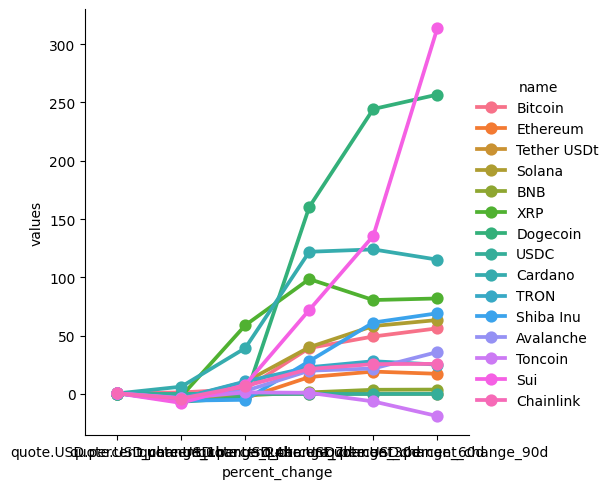

In [92]:
sns.catplot(x='percent_change' , y='values', hue='name', data = df7, kind = 'point')

In [97]:
#df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h'],['1h'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.60
1,Bitcoin,24h,1.27
2,Bitcoin,7d,4.26
3,Bitcoin,30d,39.36
4,Bitcoin,60d,49.25
...,...,...,...
85,Chainlink,24h,-3.97
86,Chainlink,7d,6.74
87,Chainlink,30d,21.41
88,Chainlink,60d,25.57


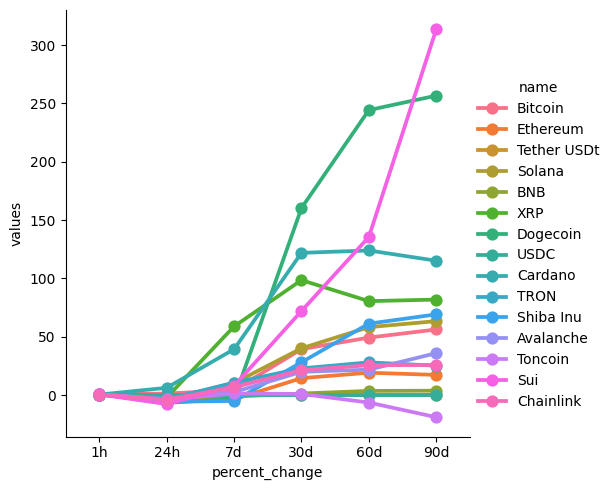

In [98]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [103]:
df10 = df[['name', 'quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,94214.34,2024-11-20 20:07:24.616153
15,Bitcoin,94526.97,2024-11-20 20:40:40.195108


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

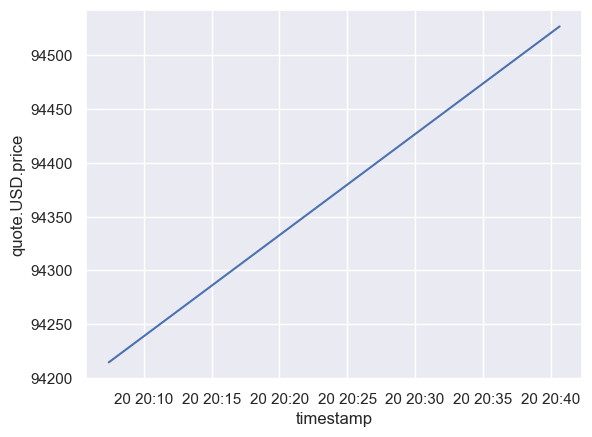

In [105]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)